<h1>Preprocess ICD9 codes</h1>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read in the ICD9 code dataset
# These are the dictionaries that store info regarding the code and what it represents
diagnoses_dict = pd.read_csv('MIMIC_Data/D_ICD_DIAGNOSES.csv')
procedures_dict = pd.read_csv('MIMIC_Data/D_ICD_PROCEDURES.csv')
notes = pd.read_csv('MIMIC_Data/NOTEEVENTS.csv')
patient_codes = pd.read_csv('MIMIC_Data/DIAGNOSES_ICD.csv')

print(diagnoses_dict.describe())
print(procedures_dict.describe())
print(patient_codes.describe())


/Users/aiswaryasankar/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             ROW_ID
count  14567.000000
mean    7284.000000
std     4205.275021
min        1.000000
25%     3642.500000
50%     7284.000000
75%    10925.500000
max    14567.000000
            ROW_ID    ICD9_CODE
count  3882.000000  3882.000000
mean   1941.500000  5466.241628
std    1120.781201  3183.187486
min       1.000000     1.000000
25%     971.250000  2837.000000
50%    1941.500000  5672.500000
75%    2911.750000  8382.750000
max    3882.000000  9999.000000
              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM
count  651047.000000  651047.000000  651047.000000  651000.000000
mean   325524.000000   38971.159758  150017.744819       7.913836
std    187941.224689   29372.198841   28878.068648       6.072633
min         1.000000       2.000000  100001.000000       1.000000
25%    162762.500000   14562.500000  125028.000000       3.000000
50%    325524.000000   28671.000000  150140.000000       6.000000
75%    488285.500000   63715.000000  174978.000000      11.000000
max 

In [42]:
# Print out the columns for each database

print('Columns diagnoses_dict')
print(diagnoses_dict.columns)

print('\nColumns procedures_dict')
print(procedures_dict.columns)

print('\nColumns patient_codes')
print(patient_codes.columns)

print('\nColumns notes')
print(notes.columns)

Columns diagnoses_dict
Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object')

Columns procedures_dict
Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object')

Columns patient_codes
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')

Columns notes
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')


In [43]:
print(notes.head())

   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Da

<h1>10 Most Common ICD9 codes</h1>

In [40]:
# Determine which are the top 10 used codes 
# Create a histogram of the ICD9_Codes used in patient_codes and extract the Short_title from the dict

extra = [(code, count) for count, code in 
          zip(patient_codes['ICD9_CODE'].value_counts(), patient_codes['ICD9_CODE'].value_counts().index.tolist())][:10]
ICD9_codes = [code for code in patient_codes['ICD9_CODE'].value_counts().index.tolist()][:10]
ICD9_counts = [count for count in patient_codes['ICD9_CODE'].value_counts()][:10]

# Given the ICD9_CODE, lookup the code in the dictionary to figure out the name
# Get another column value from dataframe if a column is a certain value
ICD9_names = [diagnoses_dict.loc[diagnoses_dict['ICD9_CODE'] == val, 'SHORT_TITLE'].item() for val in ICD9_codes]

num_patients = 46520 # total number of patients in the dataset
print('Top ICD9 codes \t\t\t\t Percent of Patients with code\n')
for code, count, name in zip(ICD9_codes, ICD9_counts, ICD9_names):
    print('%s: %s\t\t %f' %(code, name, count / num_patients))


Top ICD9 codes 				 Percent of Patients with code

4019: Hypertension NOS		 0.445034
4280: CHF NOS		 0.281836
42731: Atrial fibrillation		 0.277107
41401: Crnry athrscl natve vssl		 0.267175
5849: Acute kidney failure NOS		 0.196023
25000: DMII wo cmp nt st uncntr		 0.194712
2724: Hyperlipidemia NEC/NOS		 0.186801
51881: Acute respiratry failure		 0.161156
5990: Urin tract infection NOS		 0.140907
53081: Esophageal reflux		 0.135985


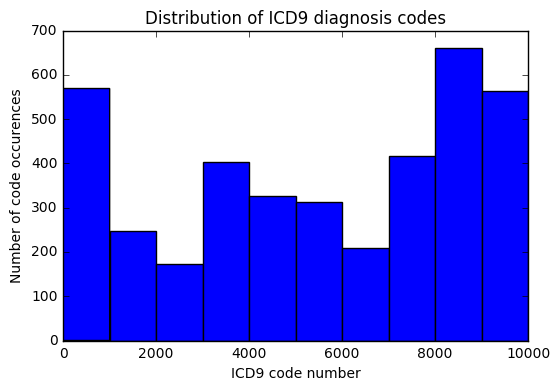

In [39]:
# Display the distribution of ICD9 diagnosis codes

plt.hist(procedures_dict['ICD9_CODE'])
plt.xlabel('ICD9 code number')
plt.ylabel('Number of code occurences')
plt.title('Distribution of ICD9 diagnosis codes')
plt.show()

<h1>Explore Medical Note database</h1>

In [41]:
# Example of one of the medical notes

print(notes.loc[2]['TEXT'])

Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]


Service: CARDIOTHORACIC

Allergies:
Amlodipine

Attending:[**Last Name (NamePattern1) 1561**]
Chief Complaint:
81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]
s/p perc trach [**5-13**]

Major Surgical or Invasive Procedure:
bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]
s/p trachealplasty [**5-5**]
percutaneous tracheostomy [**5-13**] after failed extubation
down size trach on [**5-25**] to size 6 cuffless


History of Present Illness:
This 81 year old woman has a history of COPD. Over the past five

years she has had progressive difficulties with her breathing.
In
[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure
due
to a COPD exacerbation. Due to persistent hypoxemia, she
required
intubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked

narrowing of the airways on expiration consistent with
tracheomalacia.
She subsequently un

<h3>Merge Notes with ICD9 Codes</h3>

In [20]:
# Determine the ICD9_id that connects to each note
# note -> hadm_id -> ICD9_code

print(len(notes))

# Merging left will keep all the notes and find corresponding patient_codes
notes_diagnoses1 = pd.merge(notes, patient_codes, how='left', on='HADM_ID')
print(len(notes_diagnoses1))
print(notes_diagnoses1.head())

# Merging without specifying left or right only merges the ones that match up btwn the databases
# notes_diagnoses2 = notes.merge(patient_codes)
# print(len(notes_diagnoses2))

2083180
25967884
   ROW_ID_x  SUBJECT_ID_x   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0       174         22532  167853.0  2151-08-04       NaN       NaN   
1       174         22532  167853.0  2151-08-04       NaN       NaN   
2       174         22532  167853.0  2151-08-04       NaN       NaN   
3       174         22532  167853.0  2151-08-04       NaN       NaN   
4       174         22532  167853.0  2151-08-04       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  ROW_ID_y  SUBJECT_ID_y  \
0  Admission Date:  [**2151-7-16**]       Dischar...  250889.0       22532.0   
1  Admission Date:  [**2151-7-16**]       Dischar...  250890.0       22532.0   
2  Admiss

In [45]:
# Remove all rows that don't have an ICD9 code in the top 10 list
validText = notes_diagnoses1[notes_diagnoses1.ICD9_CODE.isin(ICD9_codes)]


<h1>Bag of Words</h1>

In [ ]:
# Take the text and create vectors that represent which words in the vocabulary are present in the review
# Import various modules for string cleaning

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

# Go through each text review and convert it into a bag of words representation
# Dataset should be in format 

<h1>Create Datasets</h1>

In [47]:
# For each text object, generate a one hot label vector to represent which labels it connects to
# Currently each text has multiple rows in the dataset for each of the labels it matches with
# Go through those rows and save the corresponding labels

# Group the rows by the row id - unique identifier for each text
# group = validText.groupby('ROW_ID_x')['ICD9_CODE'].unique()

group = validText.groupby('TEXT')['ICD9_CODE'].unique()
print(group[group.apply(lambda x: len(x)>1)])

# The text will be the text field of the dataset

# The id is the corresponding ids from the group dataset
#text = validText[]

TEXT
\n\n\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             